Analyse exploratoire (EDA) 

Objectif : explorer les tendances et comprendre les données.

Axes possibles :
Évolution des ventes et profits par année et par segment
Répartition des ventes par pays, région et ville
Analyse des catégories et sous-catégories de produits
Corrélation entre remises et profits
Impact du feedback client sur la rentabilité
Visualisations : courbes, bar charts, boxplots, heatmaps.
💡 But : démontrer la maîtrise de la data visualisation et l’interprétation des résultats.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données nettoyées
data = pd.read_csv('C:/Users/georg/test/WCS_PYTON/Projets2026/1_Analyse_performances_commerciales/commandes_nettoyees.csv')
data



,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?,Year,Month,Profit_Margin
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45.0,-26.0,3,False,2011,1,-0.577778
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854.0,290.0,7,True,2011,1,0.339578
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140.0,21.0,3,True,2011,1,0.150000
3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27.0,-22.0,2,True,2011,1,-0.814815
4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17.0,-1.0,2,True,2011,1,-0.058824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7290,AZ-2014-766953,2014-12-31,Jose Gambino,United Kingdom,England,Maidenhead,North,Corporate,Economy,Furniture,Bookcases,"Ikea Stackable Bookrack, Traditional",0.0,245.0,91.0,2,True,2014,12,0.371429
7291,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Art,"BIC Pencil Sharpener, Fluorescent",0.5,30.0,-10.0,2,False,2014,12,-0.333333
7292,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Binders,"Avery Binder Covers, Recycled",0.5,23.0,-6.0,4,True,2014,12,-0.260870
7293,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Technology,Machines,"StarTech Phone, Red",0.5,108.0,-19.0,3,False,2014,12,-0.175926


In [2]:
# Paramètres graphiques
sns.set(style='darkgrid', palette='colorblind')  #style : darkgrid white dark ticks 
                                                 #palete populare: deep muted pastel bright dark colorblind
plt.rcParams['figure.figsize'] = (12,6)

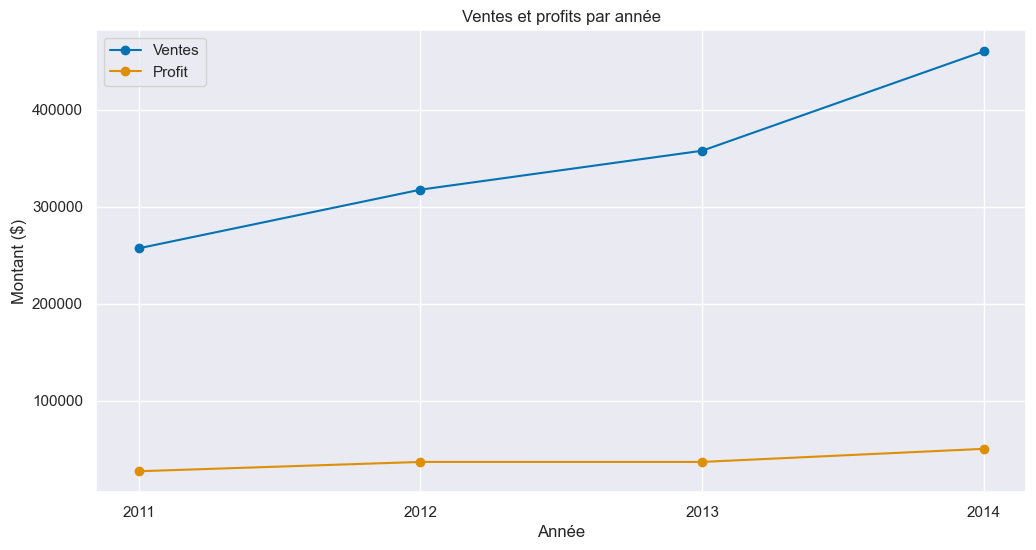

In [3]:
# 1️⃣ Evolution des ventes et profits par année
sales_year = data.groupby('Year')['Sales'].sum()   # total des ventes par année
profit_year = data.groupby('Year')['Profit'].sum() # total des profits par année

plt.plot(sales_year.index, sales_year.values, marker='o', label='Ventes')
plt.plot(profit_year.index, profit_year.values, marker='o', label='Profit')
plt.title('Ventes et profits par année')
plt.xlabel('Année')
plt.ylabel('Montant ($)')
plt.legend()
plt.xticks(sales_year.index.astype(int)) 
plt.show()


De 2011 à 2014, les ventes augmentent régulièrement (~260 000 → 450 000), alors que le profit reste relativement faible et stable (~25 000 → 50 000).

Conclusion :
Les ventes augmentent d’année en année, mais le profit reste faible en comparaison, suggérant que l’augmentation du chiffre d’affaires ne se traduit pas directement par une forte rentabilité.

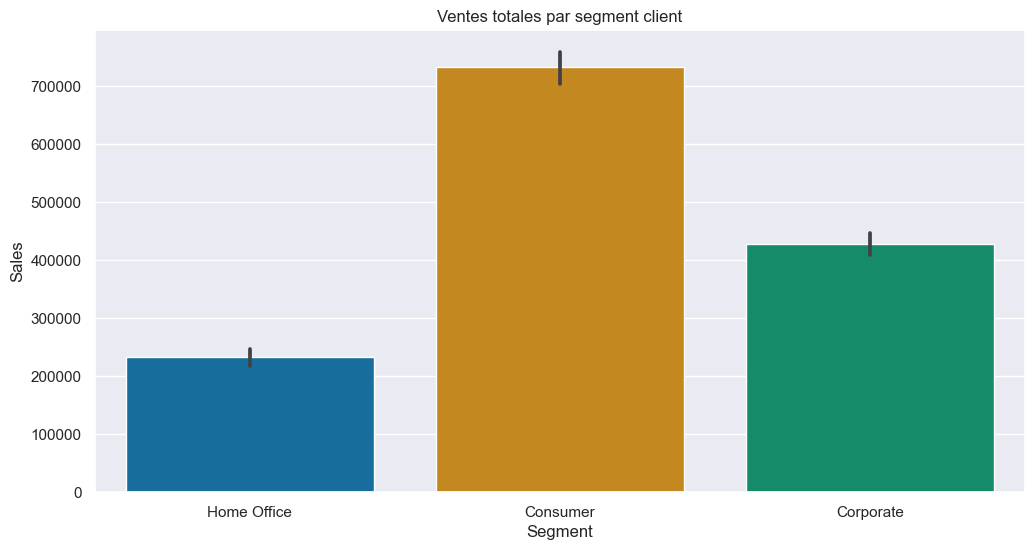

In [4]:
# 2️⃣ Répartition des ventes par segment client
sns.barplot(x='Segment', y='Sales', data=data, estimator=sum)  # somme des ventes par segment
plt.title('Ventes totales par segment client')
plt.show()

Le graphique montre que le segment Consumer a les ventes totales les plus élevées (~700 000), suivi de Corporate (~400 000) et Home Office (~220 000).

Conclusion :
Les ventes sont dominées par le segment Consumer, ce qui indique que ce segment est le plus rentable en termes de chiffre d’affaires.

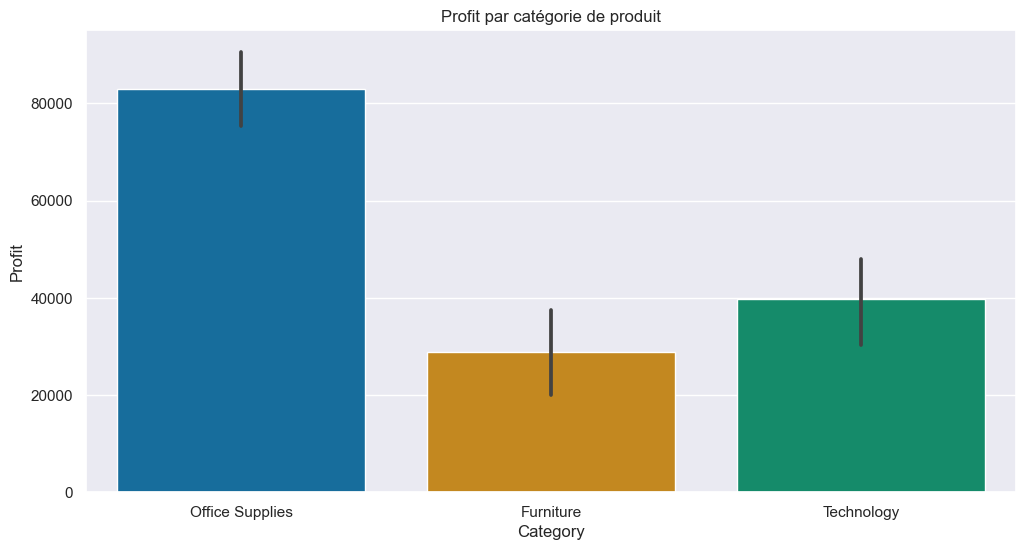

In [5]:
# 3️⃣ Analyse des profits par catégorie
sns.barplot(x='Category', y='Profit', data=data, estimator=sum) # somme des profits
plt.title('Profit par catégorie de produit')
plt.show()

Les produits Office Supplies génèrent le profit le plus élevé (~82 000), suivis de Technology (~40 000) et Furniture (~28 000).

Conclusion :
Les fournitures de bureau (Office Supplies) contribuent le plus au profit, tandis que le mobilier (Furniture) a la contribution la plus faible.

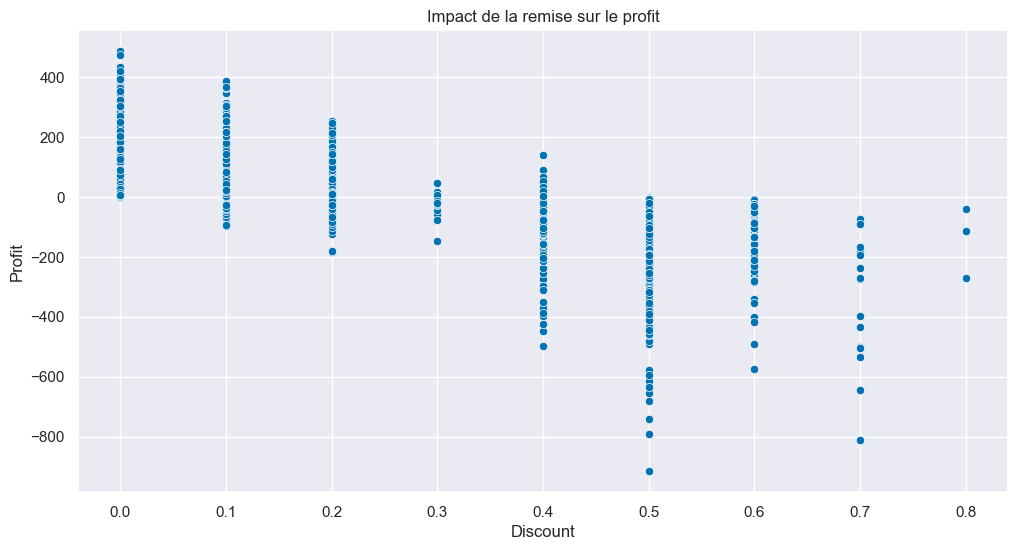

In [6]:
# 4️⃣ Impact des remises sur le profit
sns.scatterplot(x='Discount', y='Profit', data=data)
plt.title('Impact de la remise sur le profit')
plt.show()

On observe que pour des remises plus élevées (~0,5–0,7), le profit devient souvent négatif (jusqu’à -900).

Conclusion :
L’augmentation des remises a un impact négatif important sur le profit, confirmant que les réductions excessives peuvent nuire à la rentabilité.

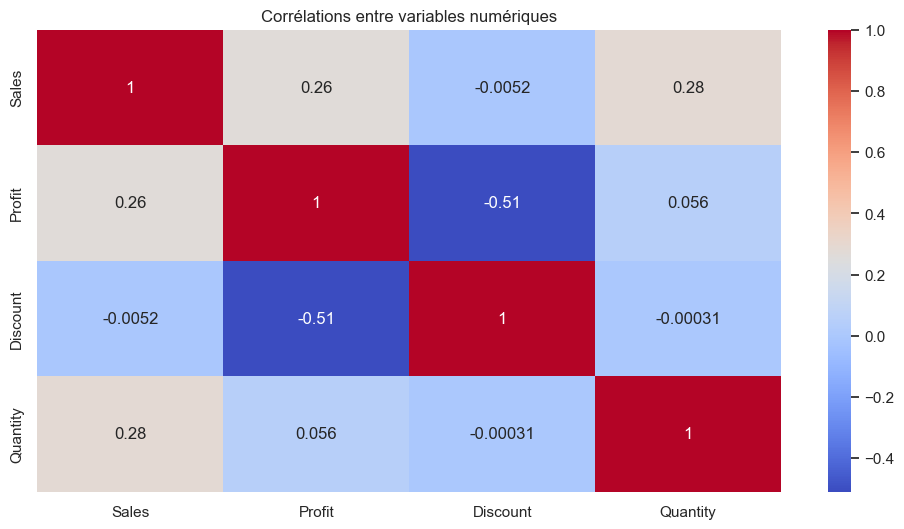

In [7]:
# 5️⃣ Heatmap des corrélations entre variables numériques
corr = data[['Sales','Profit','Discount','Quantity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Corrélations entre variables numériques')
plt.show()

L’analyse du graphique de corrélation montre que les ventes sont faiblement corrélées à la quantité vendue (r = 0,28) et au profit (r = 0,26), indiquant que l’augmentation du volume ou du profit n’entraîne qu’une hausse limitée des ventes. 

Les remises présentent une corrélation négative modérée avec le profit (r = -0,51), ce qui signifie qu’une augmentation des réductions réduit significativement la rentabilité. En revanche, les remises n’ont pratiquement aucun impact sur les ventes (r = -0,005) ni sur les quantités vendues, suggérant que les stratégies de remise ne stimulent pas la performance commerciale globale.